In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/928/928ss2onc250regcdFF20sMpsfkf156Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(3514, 156)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/928/928ss2onc250regcdFF20sMpsfkf156Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(183, 118, 11, 156)

In [7]:
S=data.shape
S

(183, 118, 11, 156)

Z-score

In [8]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [9]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [10]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [11]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/928/928Registration/JFRC928Transformedfullpsftrimmed.nii


In [12]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [13]:
Dmaps.shape

(183, 118, 11, 156)

In [14]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [15]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [16]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [17]:
J

[49]

NO
EB
8
nodulus


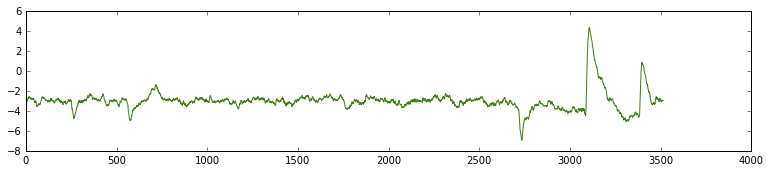

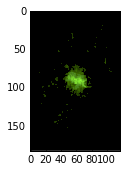

PB
ATL_R
79
PB
EB
ATL_L
87
PB
99
PB
ATL_L
109
PB
137
protocerebral bridge


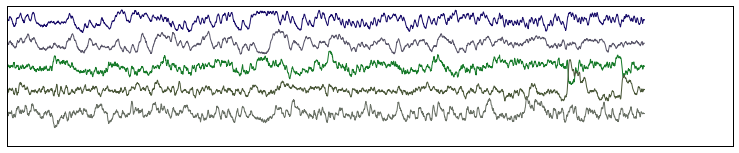

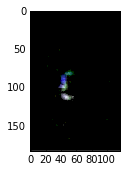

LH_R
LH_L
MB_CA_L
0
LH_R
MB_PED_R
MB_CA_R
13
LH_R
MB_CA_R
19
LH_R
MB_CA_R
55
lateral horn


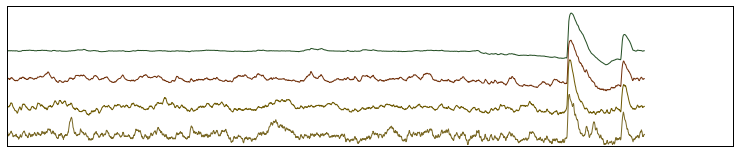

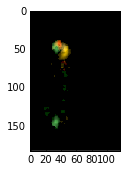

CAN_R
IPS_R
30
CAN_R
53
CAN_R
GNG
77
CAN_R
CAN_L
105
cantle


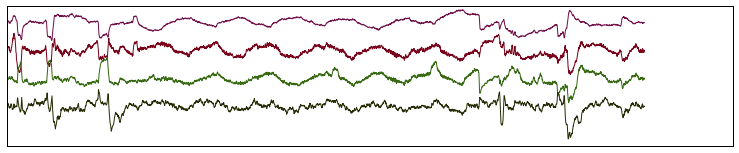

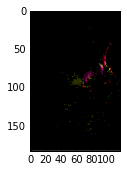

AMMC_R
GNG
31
AMMC_R
FLA_R
LOP_L
51
antennal mechanosensory and motor center


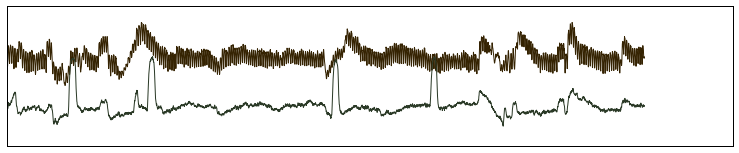

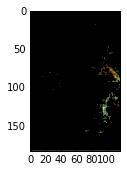

LAL_R
CRE_R
MB_PED_R
MB_ML_R
7
crepine


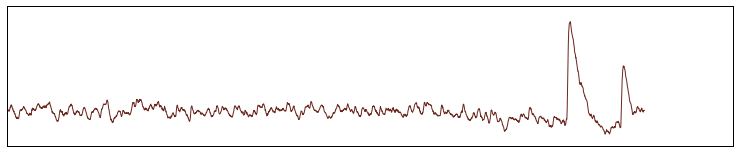

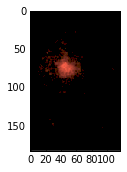

MB_PED_R
MB_CA_R
39
pedunculus of adult mushroom body


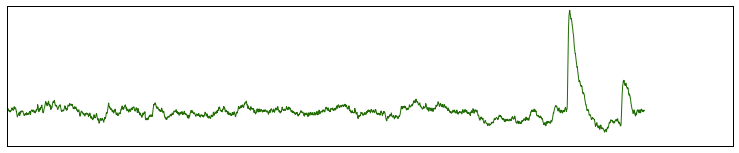

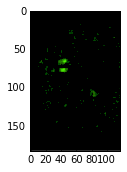

MB_VL_R
MB_ML_R
SIP_R
92
vertical lobe of adult mushroom body


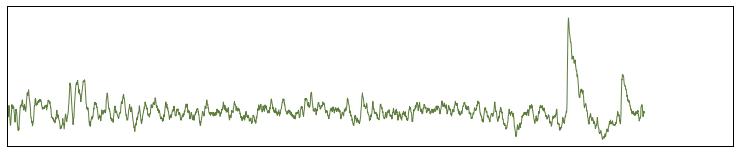

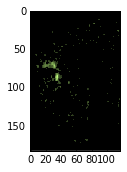

CRE_R
MB_VL_R
MB_ML_R
SIP_R
18
medial lobe of adult mushroom body


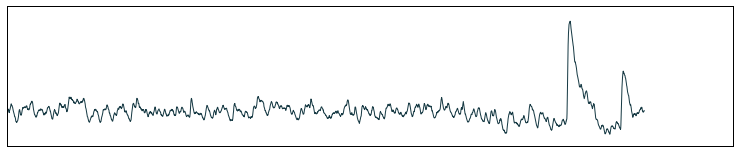

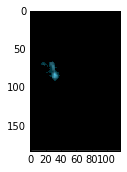

ATL_R
EB
FB
ATL_L
46
EB
FB
103
ellipsoid body


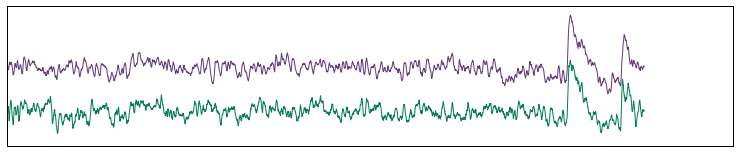

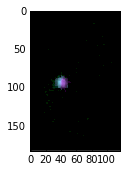

ME_R
11
ME_R
14
ME_R
16
ME_R
44
medulla


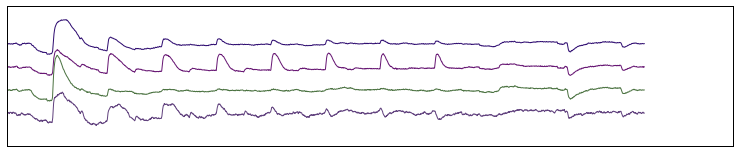

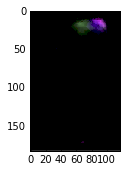

MB_VL_R
SLP_R
SIP_R
SMP_R
48
superior lateral protocerebrum


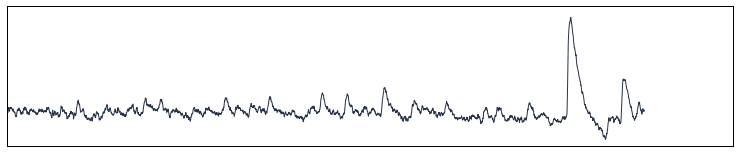

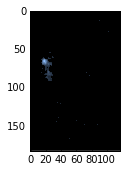

SLP_R
SMP_R
42
SMP_R
57
SMP_R
SMP_L
70
SMP_R
MB_CA_L
73
SMP_R
83
SMP_R
86
superior medial protocerebrum


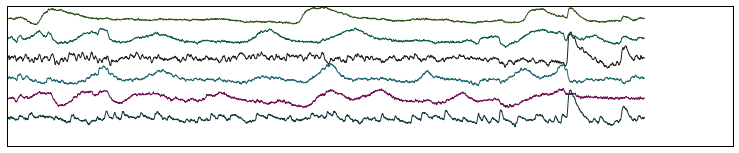

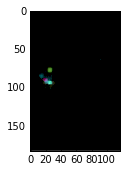

MB_CA_R
2
ICL_R
MB_CA_R
21
MB_CA_R
24
MB_CA_R
MB_CA_L
28
PB
MB_CA_R
112
calyx of adult mushroom body


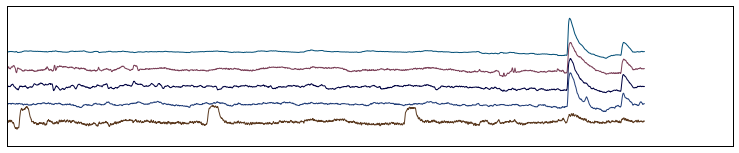

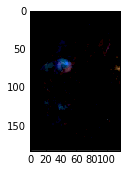

SPS_R
17
superior posterior slope


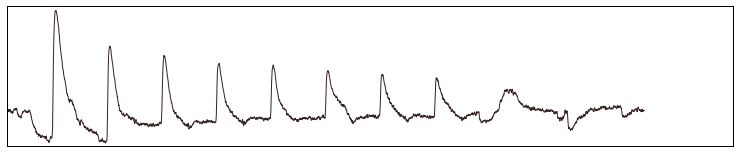

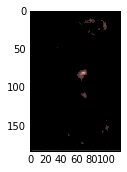

SAD
AMMC_R
IPS_R
GNG
40
IPS_R
111
inferior posterior slope


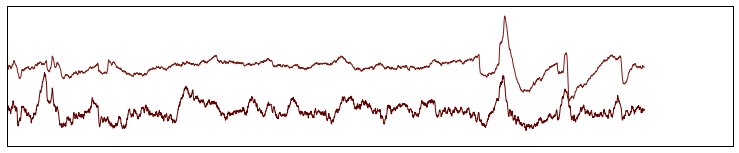

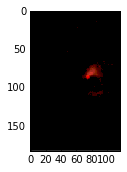

SAD
LOP_R
IPS_R
GNG
20
LOP_R
GNG
22
AMMC_R
IPS_R
GNG
27
SAD
GNG
33
SAD
IPS_R
GNG
AMMC_L
47
GNG
59
adult gnathal ganglion


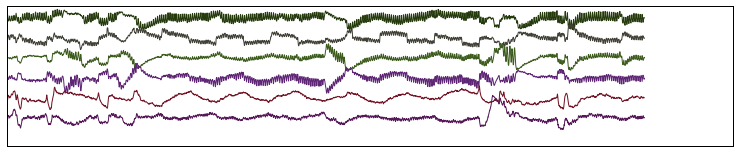

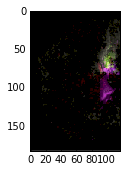

AME_L
LO_L
ME_L
35
lobula


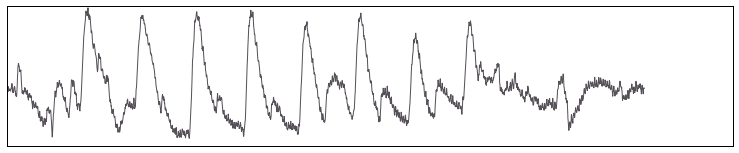

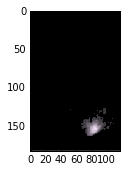

LH_L
LAL_L
MB_CA_L
29
LH_L
MB_CA_L
52
lateral horn


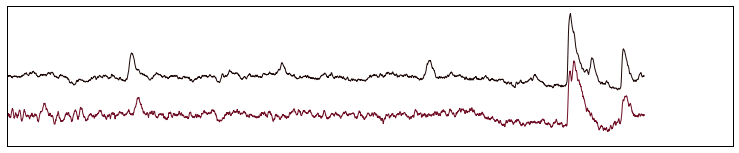

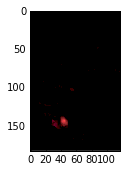

LAL_L
CRE_L
5
LH_L
LAL_L
PLP_L
EPA_L
62
lateral accessory lobe


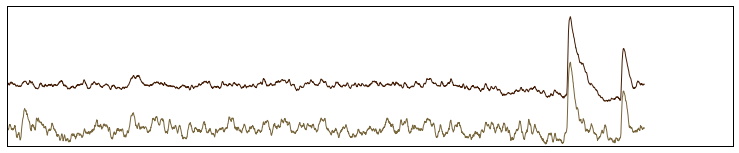

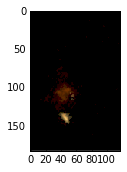

AMMC_L
IVLP_L
50
LOP_R
AMMC_L
EPA_L
118
antennal mechanosensory and motor center


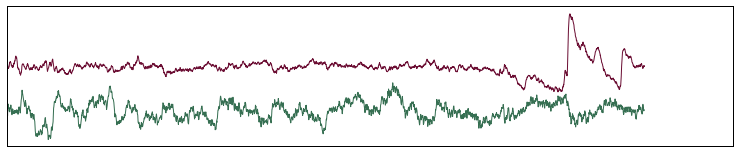

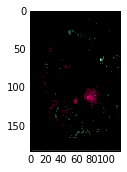

PB
ATL_L
117
antler


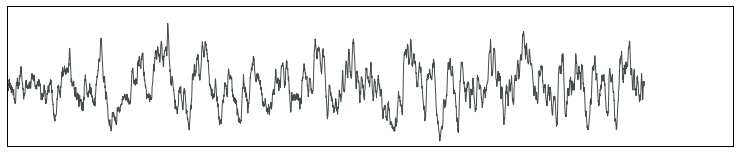

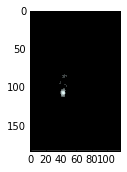

CRE_L
MB_VL_L
MB_ML_L
SIP_L
4
MB_VL_R
MB_VL_L
SLP_L
SIP_L
9
vertical lobe of adult mushroom body


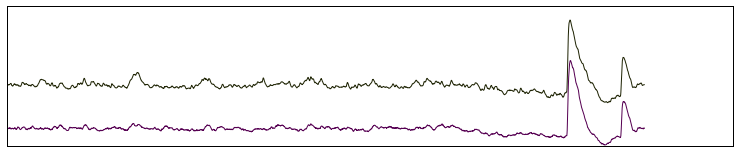

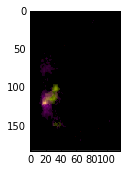

CRE_L
MB_VL_L
MB_ML_L
75
medial lobe of adult mushroom body


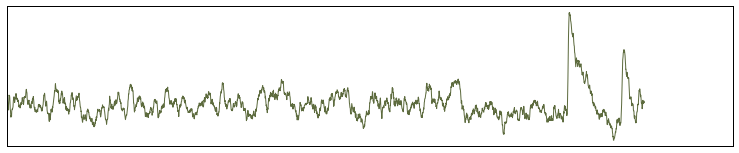

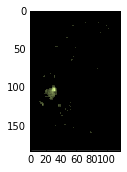

FLA_R
PRW
AMMC_L
FLA_L
60
flange


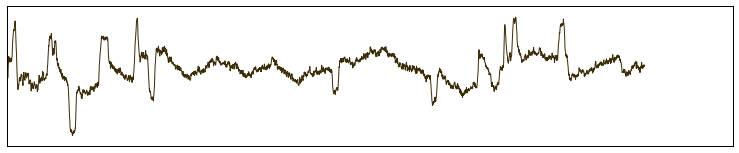

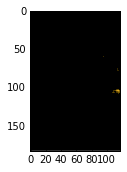

LOP_L
ME_L
1
LOP_L
ME_L
38
lobula plate


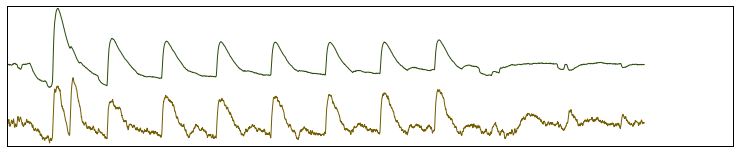

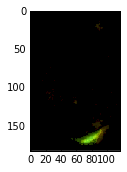

SLP_L
41
MB_CA_R
SLP_L
SMP_L
78
superior lateral protocerebrum


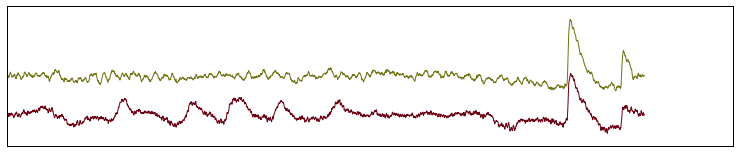

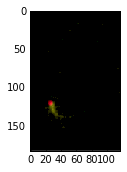

SMP_R
SMP_L
37
SMP_R
MB_CA_R
SMP_L
58
SMP_L
100
LAL_L
SLP_L
SMP_L
126
superior medial protocerebrum


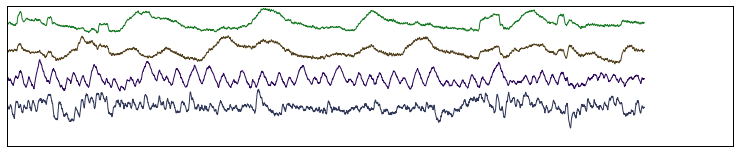

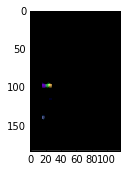

MB_CA_R
AMMC_L
IVLP_L
MB_CA_L
56
AMMC_L
IVLP_L
63
wedge


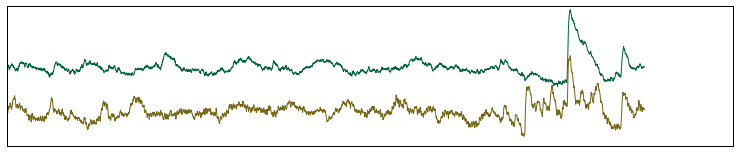

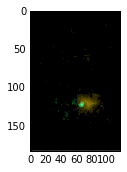

MB_PED_L
MB_CA_L
3
LH_L
LAL_L
MB_CA_L
6
MB_CA_L
12
LH_L
MB_CA_L
15
calyx of adult mushroom body


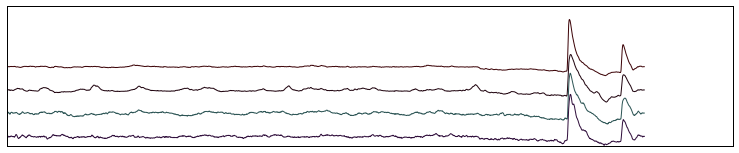

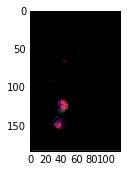

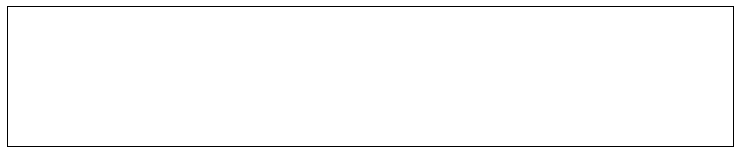

In [42]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [43]:
BadICs=[30,53,77,105,31,51,20,22,27,33,47,59,60,37,58,100]

In [44]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [45]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  1,  1,  1,  1,  1,  2,  3,  4,  4,  5,  5,  6, 14, 17, 17, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 25, 25, 25, 25, 25, 25,
       25, 25, 26, 26, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29,
       29, 29, 31, 31, 32, 32, 34, 34, 34, 34, 34, 35, 35, 36, 37, 42, 44,
       44, 44, 45, 45, 45, 46, 46, 47, 47, 47, 47, 47, 47, 47, 48, 48, 50,
       50, 51, 51, 51, 52, 53, 53, 53, 57, 58, 59, 59, 61, 61, 61, 61, 61,
       62, 64, 64, 64, 65, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67,
       67, 68, 68, 70, 72, 72, 72, 72, 72, 72, 72, 72, 73, 74, 74, 74, 74,
       74, 74, 74])

In [46]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [47]:
LargerRegionI

array([ 6,  1,  5,  5,  5,  9,  5, 10,  8,  5,  6,  1,  5,  6,  1,  5,  1,
        3,  5,  6, 12,  5, 12, 11,  5,  1,  5, 12,  5,  6, 11, 11,  5, 12,
        5,  1, 10,  7,  1,  5,  3,  7,  7,  1,  1,  8,  8, 12,  7,  7, 11,
       11,  6, 11,  3,  6,  2,  7,  7, 12, 11,  5,  9,  2,  1,  3,  3,  5,
       10, 12,  7, 11, 11,  7,  3,  5,  5, 11,  7,  8, 11,  8,  5,  7,  5,
       11,  7,  8,  5,  5,  3,  3,  5,  7,  5, 11, 11,  1,  5,  8,  7,  3,
        1,  8, 11, 11,  5,  7, 11,  8,  8,  3,  5, 11,  5,  5,  7, 10, 11,
        5, 10, 10, 11,  5, 11,  9,  7,  5,  8,  2,  5,  8,  5,  8, 11,  3,
        1,  8,  5,  8,  5,  5, 11,  5,  3, 11, 10,  5,  5,  9,  3,  8, 10,
       10, 11,  3])

In [48]:
GoodICAnat

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

OL
1
11
14
16
35
38
44


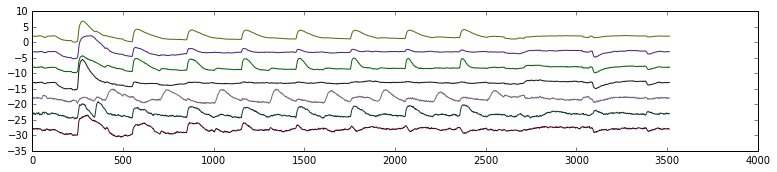

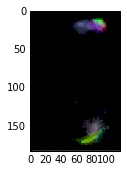

1
VLNP
56
63


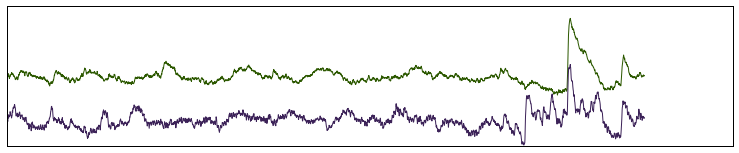

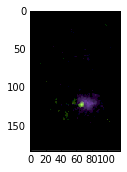

2
VMNP
17
40
111


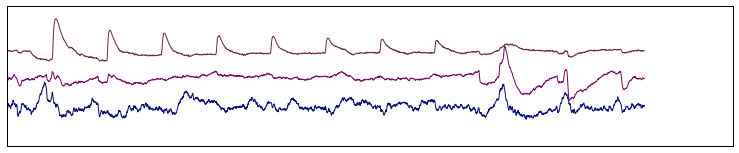

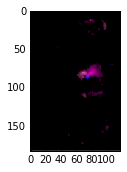

3
AL
4
MB
2
3
4
6
9
12
15
18
21
24
28
39
75
92
112


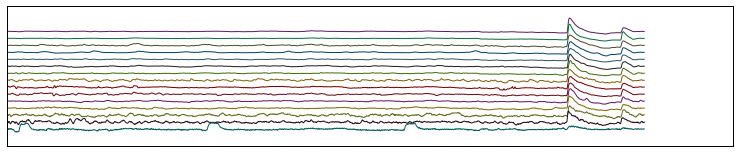

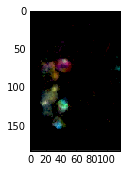

5
LH
0
13
19
29
52
55


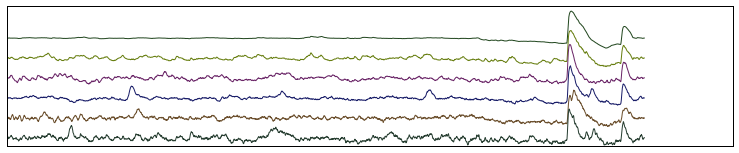

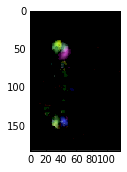

6
SNP
41
42
48
57
70
73
78
83
86
126


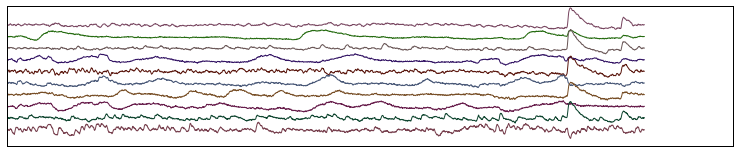

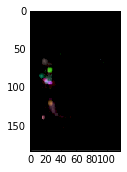

7
CX
8
46
79
87
99
103
109
137


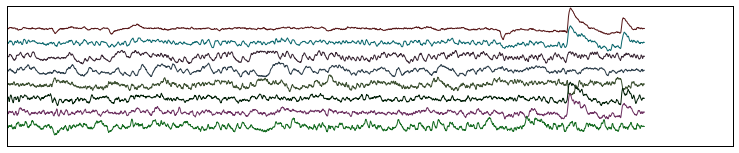

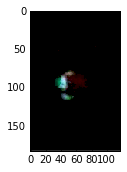

8
LX
5
62


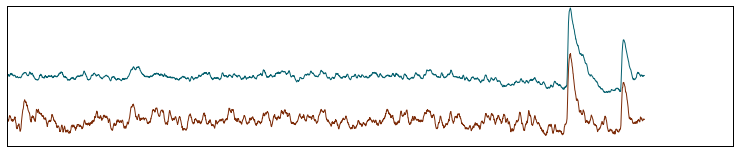

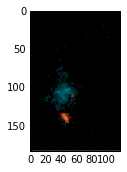

9
INP
7
117


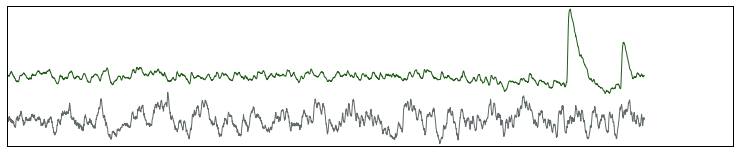

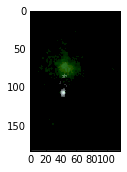

10
PENP
50
118


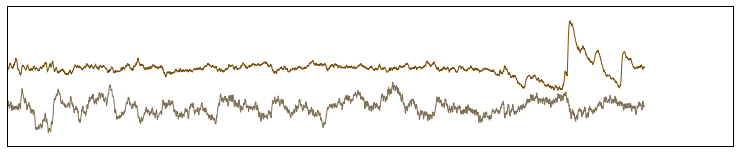

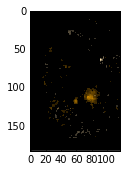

11
GNG
12


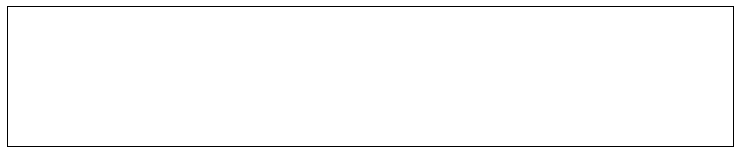

In [65]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n
    print(l)

In [64]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)